In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
df=pd.read_csv(r'/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df=df.drop('id',axis=1)

In [4]:
df.shape

(5110, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [9]:


df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
df["age"].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [11]:
df["heart_disease"].unique()

array([1, 0])

In [12]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [15]:
df["stroke"].unique()

array([1, 0])

In [16]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Calculate correlation
correlation_matrix = numeric_columns.corr()


In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 2000x1500 with 0 Axes>

In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
df["age"].value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
0.16       3
1.40       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
df.shape

(5110, 11)

In [22]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
# Replace missing values in a specific column with the mean of that column
feature_column = 'bmi'
df[feature_column] = df[feature_column].fillna(df[feature_column].mean())


In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [25]:
import pandas as pd

# Assuming df is your DataFrame containing both numerical and categorical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
text_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create new DataFrames containing only numerical and text columns
df_numerical = df[numerical_columns]
df_text = df[text_columns]

# Display the numerical and text DataFrames
print("Numerical Columns:")
print(df_numerical.head())

print("\nText Columns:")
print(df_text.head())


Numerical Columns:
    age  hypertension  heart_disease  avg_glucose_level        bmi
0  67.0             0              1             228.69  36.600000
1  61.0             0              0             202.21  28.893237
2  80.0             0              1             105.92  32.500000
3  49.0             0              0             171.23  34.400000
4  79.0             1              0             174.12  24.000000

Text Columns:
   gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
import joblib
objList = ['gender','ever_married','work_type','Residence_type','smoking_status']
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
print (df.info())
joblib.dump(le, 'label_encoder.joblib')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB
None


['label_encoder.joblib']

In [79]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


stroke
0    4861
1     249
Name: count, dtype: int64


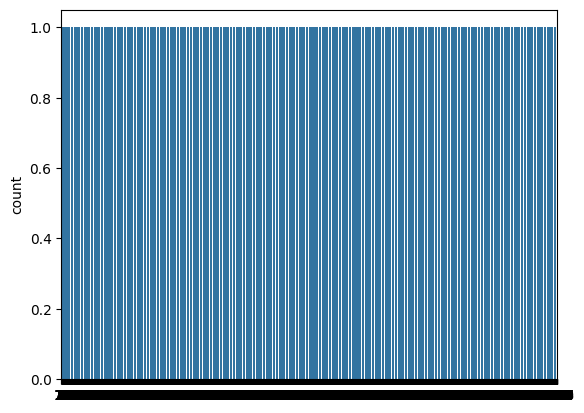

In [28]:
y = df["stroke"]
sns.countplot(y)
target_temp = df.stroke.value_counts()

print(target_temp)

In [29]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [30]:
print("Percentage of patience without stroke problems: "+str(round(target_temp[0]*100/299,2)))
print("Percentage of patience with stroke problem : "+str(round(target_temp[1]*100/299,2)))

Percentage of patience without stroke problems: 1625.75
Percentage of patience with stroke problem : 83.28


In [31]:
df["gender"].unique()

array([1, 0, 2])

In [32]:

countFemale = len(df[df.gender == 0])
countMale = len(df[df.gender == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.gender))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.gender))*100))

Percentage of Female Patients:58.59%
Percentage of Male Patients:41.39%


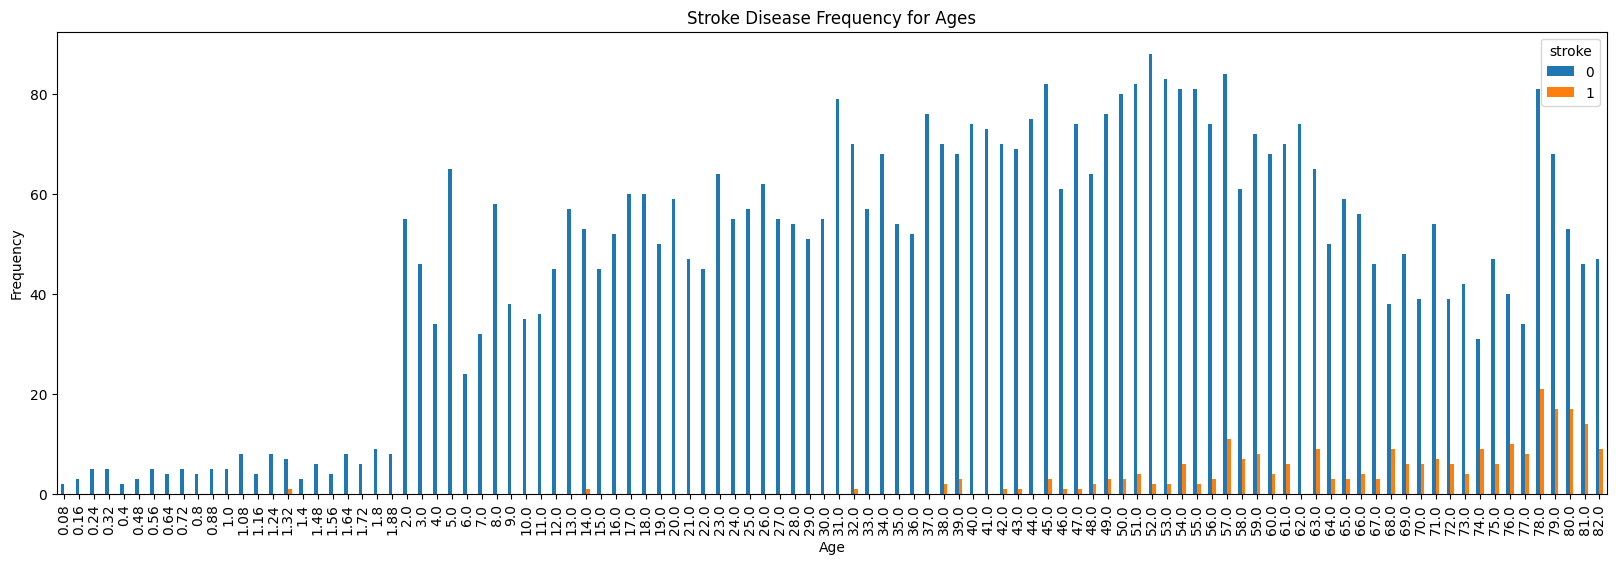

In [33]:
pd.crosstab(df.age,df.stroke).plot(kind="bar",figsize=(20,6))
plt.title('Stroke Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('StrokeDiseaseAndAges.png')
plt.show()

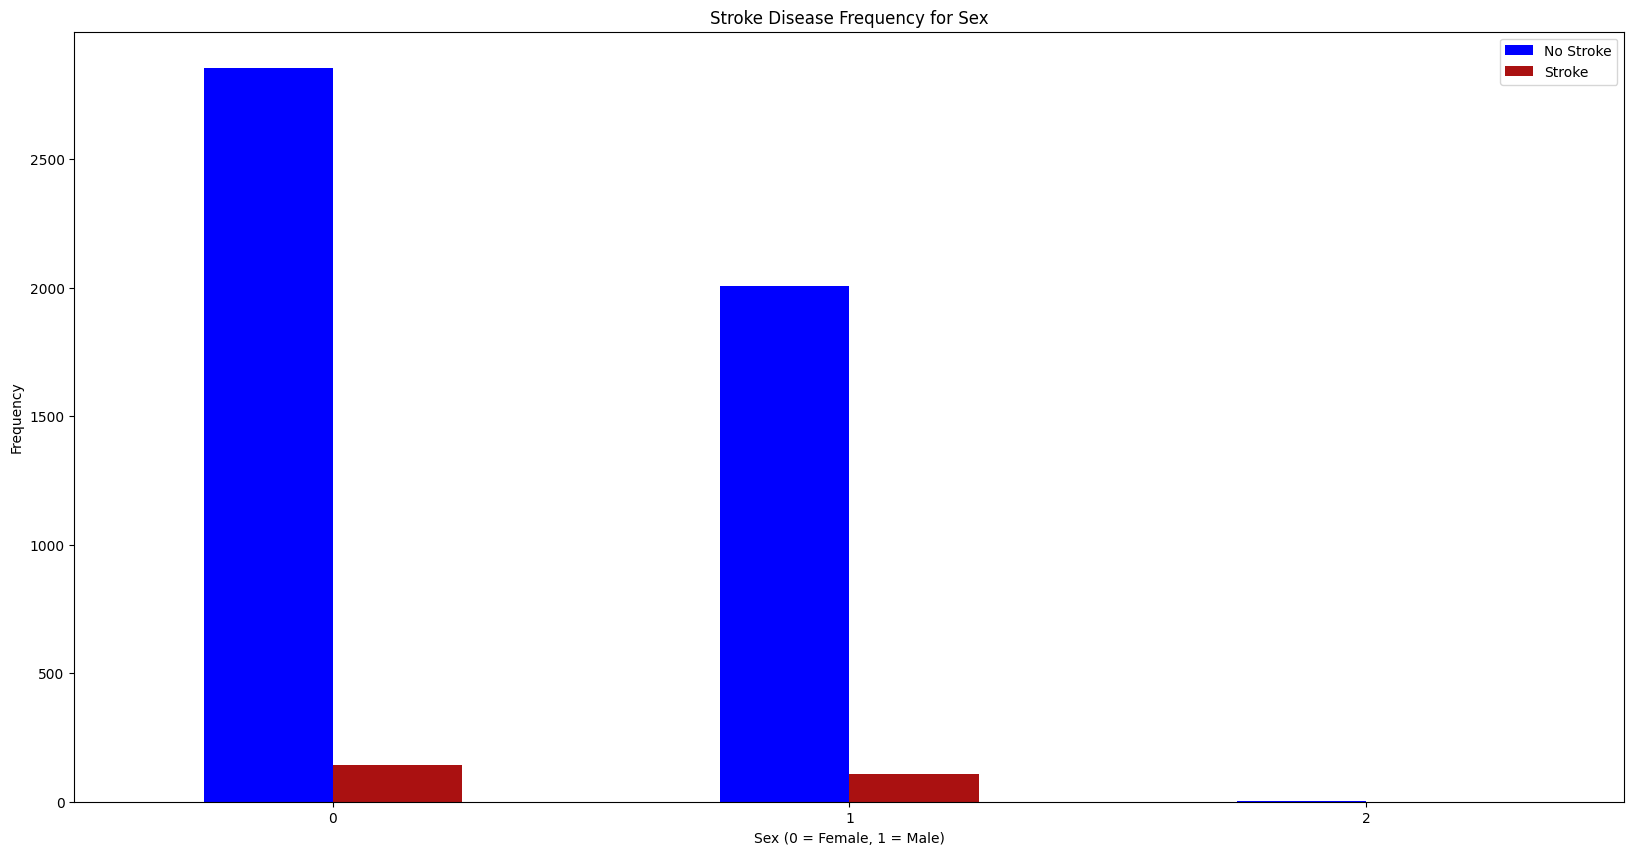

In [34]:
pd.crosstab(df.gender,df.stroke).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111','green','yellow','black' ])
plt.title('Stroke Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Stroke", "Stroke"])
plt.ylabel('Frequency')
plt.show()

In [35]:
df["Residence_type"].unique()

array([1, 0])

In [36]:
predictors = df.drop("stroke",axis=1)
target = df["stroke"]


In [37]:
target.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE

In [80]:
print("Before OverSampling, counts of label '0': {}".format(sum(target == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1)))


# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

sm = SMOTE(random_state = 65)
predictors_res, target_res = sm.fit_resample(predictors,target.ravel())

print('After OverSampling, the shape of train_X: {}'.format(predictors_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(target_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(target_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(target_res == 1)))


Before OverSampling, counts of label '0': 4861
Before OverSampling, counts of label '1': 249
After OverSampling, the shape of train_X: (9722, 10)
After OverSampling, the shape of train_y: (9722,) 

After OverSampling, counts of label '0': 4861
After OverSampling, counts of label '1': 4861


In [81]:
X = predictors_res
y = target_res

# Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_test)

# Select numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Select categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Standardize numerical columns for training, validation, and testing sets
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

      gender        age  hypertension  heart_disease  ever_married  work_type  \
9376       0  70.356571             0              0             1          2   
2963       0  51.000000             0              0             1          2   
1747       1  51.000000             0              0             1          0   
2252       0  55.000000             0              0             1          2   
7011       0  79.220018             0              0             0          2   
...      ...        ...           ...            ...           ...        ...   
3007       0  73.000000             0              0             0          3   
3405       1  47.000000             0              0             1          2   
9228       0  78.682665             0              0             1          2   
8200       0  54.358973             0              0             1          2   
5696       0  73.868735             1              0             1          2   

      Residence_type  avg_g

In [82]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7777, 10) (973, 10) (7777,) (973,)


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [84]:
pip install tensorflow-addons


In [85]:

y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Embedding, Input, concatenate, Reshape, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import MultiHeadAttention

# Assume predictors_res and target_res are your feature and target datasets

# Split the data into features (predictors_res) and target (target_res)


# Define the inputs
input_numerical = Input(shape=(X_train[numerical_columns].shape[1],))
input_categorical = Input(shape=(X_train[categorical_columns].shape[1],))

# Embedding layer for categorical features
embedding_layer = Embedding(input_dim=5, output_dim=5, input_length=4)(input_categorical)
flatten_embedding = Flatten()(embedding_layer)

# Convolutional and LSTM layers
x = Reshape((X_train[numerical_columns].shape[1], 1))(input_numerical)
x = Conv1D(filters=1024, kernel_size=9, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

# Additional Convolutional Layers
x = Conv1D(filters=512, kernel_size=8, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=256, kernel_size=7, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=128, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

# Regular Convolutional Layer
x = Conv1D(filters=512, kernel_size=8, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

# LSTM Layers
x = LSTM(1024, return_sequences=True)(x)
x = Dropout(0.25)(x)
x = LSTM(512, return_sequences=True)(x)
x = Dropout(0.25)(x)

# Transformer-like layer for numerical data
att_output = MultiHeadAttention(num_heads=4, key_dim=2)(x, x)
transformer_output = Flatten()(att_output)

# Concatenate the output of embedding and transformer layers
concatenated_layer = concatenate([flatten_embedding, transformer_output])

# Dense layers for classification
dense_layer1 = Dense(512, activation='relu')(concatenated_layer)
dense_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(256, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.5)(dense_layer2)
output_layer = Dense(1, activation='sigmoid')(dense_layer2)

# Define the model
model = Model(inputs=[input_numerical, input_categorical], outputs=output_layer)

# Compile the model with Adamax optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




In [47]:
# Train the model
history = model.fit(
    [X_train[numerical_columns], X_train[categorical_columns]],
    y_train,
    epochs=150,
    batch_size=256,
    validation_data=([X_val[numerical_columns], X_val[categorical_columns]], y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test[numerical_columns], X_test[categorical_columns]], y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/150
31/31 [==============================] - 2s 49ms/step - loss: 0.0472 - accuracy: 0.9843 - val_loss: 0.2511 - val_accuracy: 0.9372
Epoch 2/150
31/31 [==============================] - 2s 56ms/step - loss: 0.0412 - accuracy: 0.9862 - val_loss: 0.2639 - val_accuracy: 0.9342
Epoch 3/150
31/31 [==============================] - 2s 56ms/step - loss: 0.0409 - accuracy: 0.9862 - val_loss: 0.2667 - val_accuracy: 0.9311
Epoch 4/150
31/31 [==============================] - 2s 63ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.2639 - val_accuracy: 0.9352
Epoch 5/150
31/31 [==============================] - 2s 55ms/step - loss: 0.0386 - accuracy: 0.9859 - val_loss: 0.2540 - val_accuracy: 0.9342
Epoch 6/150
31/31 [==============================] - 1s 45ms/step - loss: 0.0404 - accuracy: 0.9853 - val_loss: 0.2880 - val_accuracy: 0.9331
Epoch 7/150
31/31 [==============================] - 1s 45ms/step - loss: 0.0410 - accuracy: 0.9861 - val_loss: 0.2707 - val_accuracy: 0.9362
Epoch 

In [54]:
test_loss

0.26036569476127625

In [78]:
# Accept user inputs for the features
age = float(input("Enter age: "))
gender = int(input("Enter gender (0 for female, 1 for male): "))
hypertension = int(input("Enter hypertension status (0 for No, 1 for Yes): "))
heart_disease = int(input("Enter heart disease status (0 for No, 1 for Yes): "))
ever_married = int(input("Enter marital status (0 for No, 1 for Yes): "))
work_type = int(input("Enter work type (0 for Private, 1 for Self-employed, 2 for Govt_job, 3 for Children, 4 for Never_worked): "))
residence_type = int(input("Enter residence type (0 for Urban, 1 for Rural): "))
avg_glucose_level = float(input("Enter average glucose level: "))
bmi = float(input("Enter BMI: "))
smoking_status = int(input("Enter smoking status (0 for Unknown, 1 for formerly smoked, 2 for never smoked, 3 for smokes): "))

# Preprocess the user inputs
X_user_numerical = scaler.transform([[age, hypertension, heart_disease, avg_glucose_level, bmi]])
X_user_categorical = np.array([[gender, ever_married, work_type, residence_type, smoking_status]])

# Make prediction
prediction = model.predict([X_user_numerical, X_user_categorical])

# Convert prediction to human-readable format
if prediction[0] >= 0.5:
    result = "likely to have a stroke"
else:
    result = "unlikely to have a stroke"

print("Based on the provided information, the person is", result)


Enter age: 51
Enter gender (0 for female, 1 for male): 1
Enter hypertension status (0 for No, 1 for Yes): 0
Enter heart disease status (0 for No, 1 for Yes): 0
Enter marital status (0 for No, 1 for Yes): 1
Enter work type (0 for Private, 1 for Self-employed, 2 for Govt_job, 3 for Children, 4 for Never_worked): 0
Enter residence type (0 for Urban, 1 for Rural): 1
Enter average glucose level: 166
Enter BMI: 25.6
Enter smoking status (0 for Unknown, 1 for formerly smoked, 2 for never smoked, 3 for smokes): 1
1/1 [==============================] - 0s 23ms/step
Based on the provided information, the person is unlikely to have a stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


31/31 [==============================] - 1s 7ms/step


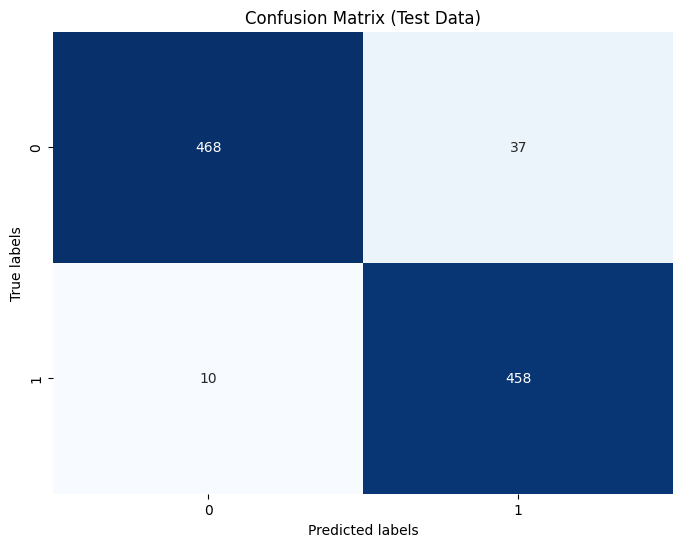

Accuracy: 0.9517
Precision: 0.9253
Recall: 0.9786
F1 Score: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       505
           1       0.93      0.98      0.95       468

    accuracy                           0.95       973
   macro avg       0.95      0.95      0.95       973
weighted avg       0.95      0.95      0.95       973



In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained the model and obtained predictions on test data
y_pred = model.predict([X_test[numerical_columns], X_test[categorical_columns]])
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Calculate other evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
from sklearn.metrics import classification_report


# Generate classification report
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)



In [51]:
# Assuming you have trained the model and obtained predictions on test data
loss, accuracy = model.evaluate([X_test[numerical_columns], X_test[categorical_columns]], y_test)

print(f'Loss on Test Data: {loss:.4f}')


31/31 [==============================] - 0s 9ms/step - loss: 0.2604 - accuracy: 0.9517
Loss on Test Data: 0.2604


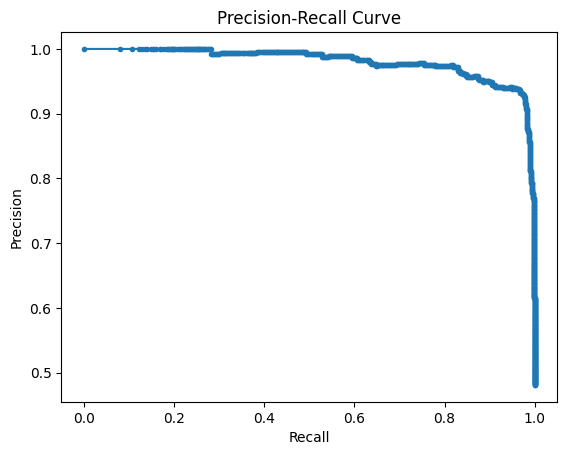

In [52]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


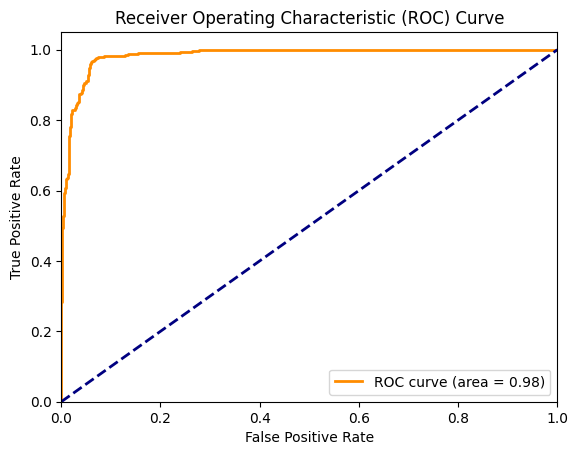

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Embedding, Input, concatenate, Reshape, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Nadam,RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import MultiHeadAttention
import numpy as np

# Define the inputs
input_numerical = Input(shape=(X_train_numerical.shape[1],))
input_categorical = Input(shape=(X_train_categorical.shape[1],))

# Embedding layer for categorical features
embedding_layer = Embedding(input_dim=5, output_dim=5, input_length=4)(input_categorical)
flatten_embedding = Flatten()(embedding_layer)

# Convolutional and LSTM layers
x = Reshape((X_train_numerical.shape[1], 1))(input_numerical)
x = Conv1D(filters=1024, kernel_size=9, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

# Additional Convolutional Layers
x = Conv1D(filters=512, kernel_size=8, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=512, kernel_size=8, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=256, kernel_size=7, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=128, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

x = Conv1D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

# Regular Convolutional Layer
x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)

# LSTM Layers
x = LSTM(1024, return_sequences=True)(x)
x = Dropout(0.25)(x)
x = LSTM(512, return_sequences=True)(x)
x = Dropout(0.25)(x)

# Transformer-like layer for numerical data
att_output = MultiHeadAttention(num_heads=2, key_dim=2)(x, x)
transformer_output = Flatten()(att_output)

# Concatenate the output of embedding and transformer layers
concatenated_layer = concatenate([flatten_embedding, transformer_output])

# Dense layers for classification
dense_layer1 = Dense(512, activation='relu')(concatenated_layer)
dense_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(256, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.5)(dense_layer2)
output_layer = Dense(1, activation='sigmoid')(dense_layer2)

# Define the model
model = Model(inputs=[input_numerical, input_categorical], outputs=output_layer)

# Compile the model with Nadam optimizer
optimizer =Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit([X_train_numerical, X_train_categorical], y_train, epochs=150, batch_size=256, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate([X_test_numerical, X_test_categorical], y_test)[1]
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your test data ready: X_test_numerical, X_test_categorical, and y_test

# Predict on test data
y_pred = model.predict([X_test_numerical, X_test_categorical])
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 15}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
  from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df_categorical):
    encoder = LabelEncoder()
    df_encoded = df_categorical.copy()  # Create a copy of the DataFrame

    # Encode each categorical column in the DataFrame
    for column in df_categorical.columns:
        df_encoded[column] = encoder.fit_transform(df_categorical[column])

    return df_encoded



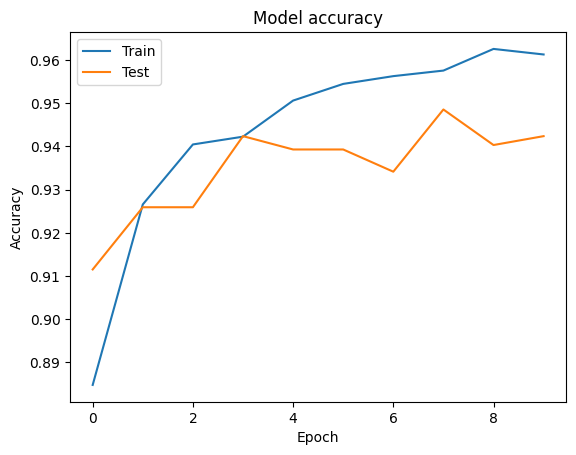

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Call the function with the history object
plot_accuracy(history)


In [ ]:
pr=model.predict([X_test[numerical_columns], X_test[categorical_columns]])

31/31 [==============================] - 0s 7ms/step


In [ ]:
import pickle
pickle.dump(pr,open("model.pkl","wb"))